## 基于Python的基金定投分析

通过获取过去10年的股市数据分析基金定投的收益率。

**提交要求**：
- 必须用Jupyter Notebook完成，保存为ipynb格式提交
- 提交文件名为“Python数据分析第4次作业+班级+姓名.ipynb” （注：请规范文件名）
- 提交到刘顿同学的邮箱 810792334@qq.com
- 提交的截止时间为2019年3月15日下午17:00

[参考]  <a href="https://www.zhihu.com/question/35163926/answer/839797133">基金定投一定赚钱吗？</a>

#### 首先，什么是基金？
简单的说，基金是一种募集资金的产品；或者通俗一点来讲就咱们把钱交给专业的人士投资，也就是基金经理，他把咱们的钱投资到股票、债券、货币市场等，好比服装厂加工、设计制作衣服一样，可能你会生产很多服装布料，但是不会制作衣服，那加工产就负责把你提供的一堆布料等联合设计啊，品牌啊等，把她生产出来，变成可以穿的衣服 。

专业的事，交给专业的人做。那基金呢又可分为以下几类：
1. 募集起来的钱去投资各公司的股票，就是股票基金；
2. 募集起来的钱去投资国债、地方债、企业债等，就是债券基金
3. 募集起来的钱去投资银行短期理财、现金等，就是货币基
4. 募集起来的钱又去投资股票、又去投资债券，就是混合型基金。

所以要看基金种类，得具体看拿去买了什么--- 然后，还有一种稍微复杂一点的基金，叫做**指数基金**。

#### 那么，什么是指数基金？

大家应该能理解股票指数就是指按照一定的规则所选择的股票的平均值。比如
1. 上证50指数：就是把上海证券交易所规模最大、流动性最好的50家公司的股票统计起来的股票平均值。
2. 沪深300指数：就是把上交所和深交所前300只规模最大、流动最好的300家公司的股票统计起来的股票平均值。
3. 中证500指数：把沪深300指数的前300家大公司排除，剩下的大公司中再选前500只规模最大、流动最好的500家公司的股票统计起来的股票平均值。

总结概括：指数基金即按照某选股规则选出来的一堆股票的集合，美名曰：**指数基金**


#### 什么是基金定投？
基金定投，就是按照固定的频率和固定的金额，不停分批次小额买入金融市场上的基金。为什么要这么麻烦，这样做有什么好处吗？我们本次“数据分析和挖掘”的第四次作业就**指数基金定投**的效果来分析一下。

注：定投可以选择任何种类的基金。我们以指数基金为例，因为大部分传说中**无脑定投**的案例都是以指数基金的定投方式

#### 数据来源：
- 通过API接口从网易财经上进行调取

#### 接口规范
 - http://quotes.money.163.com/service/chddata.html?code=003833&start=19901219&end=20200228&fields=TCLOSE;HIGH;LOW;TOPEN;LCLOSE;CHG;PCHG;VOTURNOVER;VATURNOVER

其中
- code参数后面的7位整数代表了股票代码；比如0000001指的是上证指数。注意这串数字要分0和000001两部分看。0代表sh，1代表sz。所以0000001其实是sh000001的意思。同理，0 000300也就是sh000300 沪深300的代码。
- start和end参数后面的8位整数代表年（xxxx）月(xx)日(xx)
- fields选项中，TCLOSE，HIGH,LOW,TOPEN分别表示当日的收盘，最高，最低，开盘价；LCLOSE表示昨日收盘价。CHG,PCHG,VOTURNOVER,VAT分别表示涨跌额，涨跌幅，成交量，成交金额。

#### 常见指数基金/股票代码
- 0000300 - 沪深300
- 0000001 - 上证指数
- 0000016 - 上证50
- 399005 - 中小板指
- 399673 - 创业板50
- 000903 - 中证100
- ... 待更新

<hr>

#### 沪深300指数数据预览

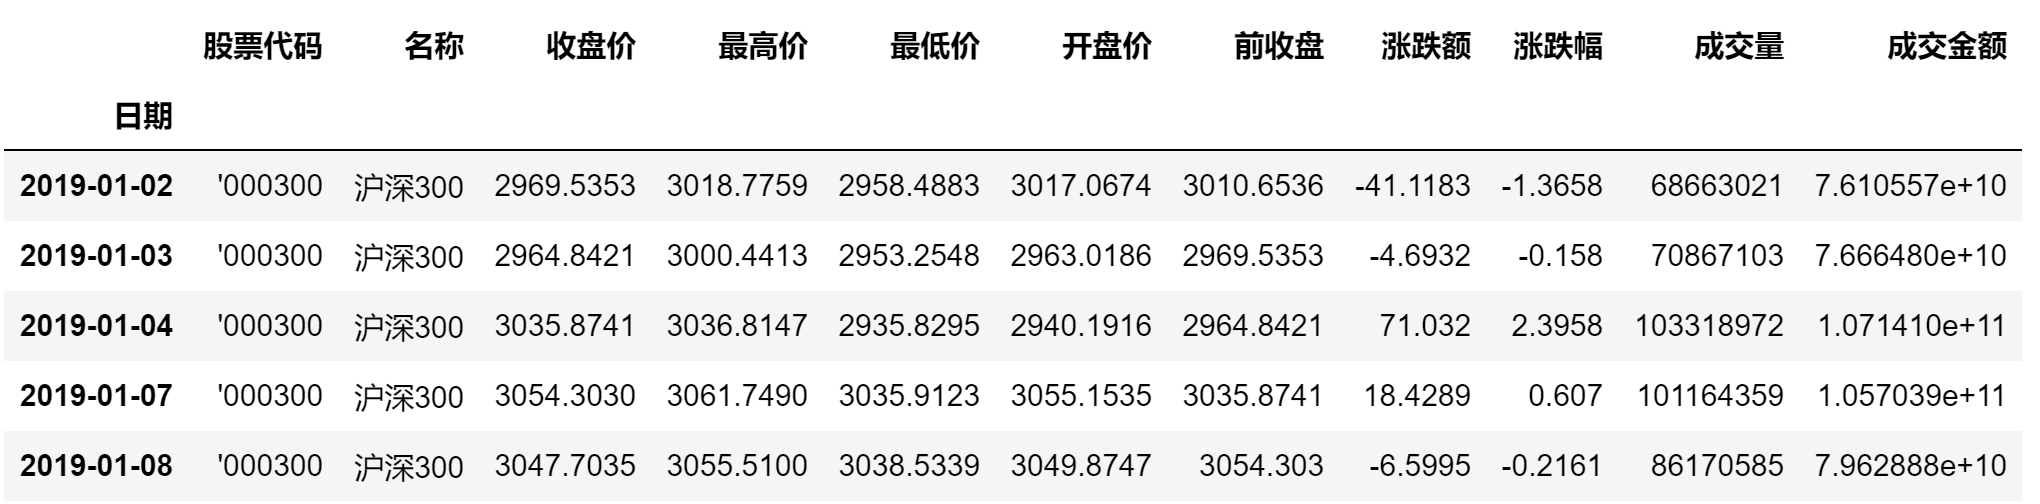

其中定投收益率的简单计算其实就是按照该指数基金的每日收盘价来计算投入资金的份额，然后以年为单位计算累积投入资金的盈利或者亏损的百分比。

<hr>

#### 需要完成的任务
1. 假设定投的金额是500元，每周定投一次，据此计算2019年对**沪深300指数**基金进行定投的收益率
2. 假设定投的金额是500元，每周定投一次，据此**分别**计算从2002年开始到2019年，每年定投**沪深300指数基金**的收益率并将结果可视化
3. 探索不同的定投策略，看看你能否得到更好的定投收益呢？通过改变定投策略，在2018年和2019年获得**平均收益率前10名的同学将获得的本次作业的额外加分**。

注：不同的定投策略可以是改变定投周期（比如从每周定投到每月定投），改变定投金额（比如从固定金额到固定比例），设定止损或者止盈策略等等。

#### 建议和流程：
1. 加载模块 - 常见的numpy/pandas/datetime/matplotlib等
2. 定义参数 - 用于基金定投的一些参数；比如定投金额，定投周期等
3. 数据获取 - 定义get_data()函数用于获取数据 （hint: pandas的read_csv()函数） 
4. 数据预处理 - 调用pandas对象的head()方法预览少量数据
5. 数据可视化 - 调用pandas对象的plot()方法进行简单的数据可视化
6. 数据分析 - 定义invest()函数实现定投功能
7. 结果评估 - 输出分析结果并可视化

## 一、加载模块

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.family']='SimHei'
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['figure.figsize']=(12,8)

## 二、定义获取数据、清洗数据的函数

In [138]:

def get_data(code,start,end):
    '''
    获取指定时间范围的股票数据
    :param code: 指数代码
    :param start: 起始日期
    :param end: 截止日期
    :return: DataFrame
    '''
    url='http://quotes.money.163.com/service/chddata.html?code={}&start={}&end={}&fields=TCLOSE;HIGH;LOW;TOPEN;LCLOSE;CHG;PCHG;VOTURNOVER;VATURNOVER'.format(code,start,end)
    name=code+'_'+start+"-"+end
    f=open(name,'wb')
    f.write(requests.get(url).content)
    f.close()
    data=pd.read_csv(name,encoding='gbk')
    return data

def clean_data(data):
    '''
    1、将日期转换为时间序列并设置为索引
    2、将数据按时间序列升序排序
    3、删除缺失值
    4、将涨跌幅的单位转换为小数
    
    '''
    data['日期']=pd.to_datetime(data['日期'])
    data=data.set_index("日期")
    data=data.sort_index()
    data.drop(data[data["涨跌幅"]=="None"].index,axis=0,inplace=True)
    data["涨跌幅"]=data['涨跌幅'].astype('float')
    data['涨跌幅']/=100
    return data


### 1. 假设定投的金额是500元，每周定投一次，据此计算2019年对**沪深300指数**基金进行定投的收益率

In [139]:
df1=get_data('0000300','20190102','20191231')
df1=clean_data(df1)
df1.head()

,股票代码,名称,收盘价,最高价,最低价,开盘价,前收盘,涨跌额,涨跌幅,成交量,成交金额
日期,,,,,,,,,,,
2019-01-02,'000300,沪深300,2969.5353,3018.7759,2958.4883,3017.0674,3010.6536,-41.1183,-0.013658,68663021,7.610557e+10
2019-01-03,'000300,沪深300,2964.8421,3000.4413,2953.2548,2963.0186,2969.5353,-4.6932,-0.001580,70867103,7.666480e+10
2019-01-04,'000300,沪深300,3035.8741,3036.8147,2935.8295,2940.1916,2964.8421,71.0320,0.023958,103318972,1.071410e+11
2019-01-07,'000300,沪深300,3054.3030,3061.7490,3035.9123,3055.1535,3035.8741,18.4289,0.006070,101164359,1.057039e+11
2019-01-08,'000300,沪深300,3047.7035,3055.5100,3038.5339,3049.8747,3054.3030,-6.5995,-0.002161,86170585,7.962888e+10


Text(0.5, 1.0, '2019沪深300指数')

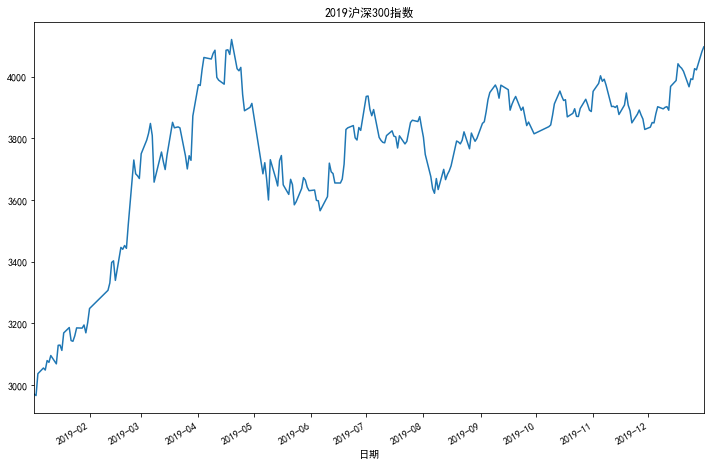

In [140]:
df1['收盘价'].plot()
plt.title('2019沪深300指数')

In [141]:

def invest(df1,frequence,invest_money,start_time):
    '''
     定投计算
    :param df1: 数据集
    :param frequence: 定投频率
    :param invest_money: 每次定投金额
    :param start: 定投起始日期
    :return (amount,invest_log): (收益数据DataFrame，定投记录dict)
    '''
    invest_log={}#每次定投的日期记录(日期:大盘指数)
    invest_day=start_time#每次投资的时间
    invest_amount=0#总投资金额
    profile=0#总投资收益
    amount=0#账户总资产
    
    profile_log=[]#总收益日志
    invest_amount_log=[]#账户投资金额日志
    amount_log=[]#总资产日志
    Yield=[]#收益率日志
    
    for date,quote_change,index in zip(df1.index,df1['涨跌幅'],df1['收盘价']):
        profile+=quote_change*amount#计算当天收益率
        profile_log.append(profile)
        
       
        #判断是否为定投日
        if date==invest_day:
            invest_amount+=invest_money
            invest_log[invest_day]=index#记录定投当日的指数
            
            #判断7天后是否为交易日,如果不是则往后加1天直到找到交易日
            invest_day+=np.timedelta64(frequence,'D')
            flag=0
            while(True):
                if(df1[df1.index==invest_day].index==invest_day):
                    break
                else:
                    invest_day+=np.timedelta64(1,'D')
                    flag+=1
                    if(flag==100):
                        break
                        
            
        invest_amount_log.append(invest_amount)
        amount=invest_amount+profile#更新账户总资产
        amount_log.append(amount)
        try:
            Yield.append(profile/invest_amount*100)#更新收益率
        except:
            Yield.append(0)
    print("总投资：",invest_amount)
    print("总收益：",profile)
    print("收益率: ",profile/invest_amount*100,"%")
    
    over=pd.DataFrame({
        "日期":df1.index,
        "收益率":Yield,
        "账户资产":amount_log,
        "投资金额":invest_amount_log
    })
    over=over.set_index("日期")
    return over,invest_log

2019年定投结果显示：
总投资： 26000
总收益： 2531.3041918259287
收益率:  9.735785353176649 %


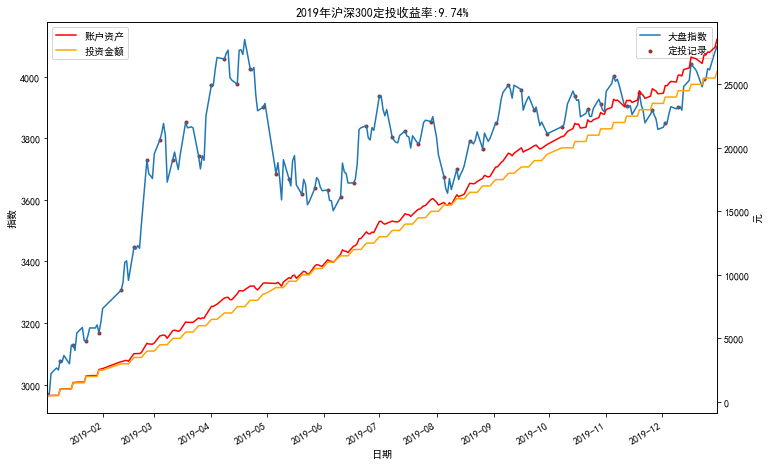

In [151]:
frequence=7#定投频率
invest_money=500#每次定投金额
start=np.datetime64("2019-01-02")
print("2019年定投结果显示：")
res,buy=invest(df1,frequence,invest_money,start)

def myplot(df1,res,buy,titlename):
    '''
    绘制定投结果图
    '''
    plt.figure()
    df1['收盘价'].plot(label="大盘指数")
    plt.scatter(buy.keys(),buy.values(),color="brown",marker=".",label="定投记录")
    plt.legend(loc='best')
    plt.ylabel("指数")
    plt.twinx()

    res['账户资产'].plot(color="red")
    res['投资金额'].plot(color="orange")
    plt.ylabel("元")
    plt.legend()
    plt.title(titlename+":{:.2f}%".format(res.tail(1)["收益率"][0]))
    plt.show()
titlename="2019年沪深300定投收益率"
myplot(df1,res,buy,titlename)

### 2、假设定投的金额是500元，每周定投一次，据此**分别**计算从2002年开始到2019年，每年定投**沪深300指数基金**的收益率并将结果可视化

In [143]:
df2=get_data('0000300','20020101','20191231')
df2=clean_data(df2)
df2.head()

,股票代码,名称,收盘价,最高价,最低价,开盘价,前收盘,涨跌额,涨跌幅,成交量,成交金额
日期,,,,,,,,,,,
2002-01-07,'000300,沪深300,1302.08,1302.08,1302.08,1302.08,1316.46,-14.38,-0.010923,0,0.0
2002-01-08,'000300,沪深300,1292.71,1292.71,1292.71,1292.71,1302.08,-9.37,-0.007196,0,0.0
2002-01-09,'000300,沪深300,1272.65,1272.65,1272.65,1272.65,1292.71,-20.06,-0.015518,0,0.0
2002-01-10,'000300,沪深300,1281.26,1281.26,1281.26,1281.26,1272.65,8.61,0.006765,0,0.0
2002-01-11,'000300,沪深300,1249.81,1249.81,1249.81,1249.81,1281.26,-31.45,-0.024546,0,0.0


Text(0.5, 1.0, '2002年-2019年沪深300指数')

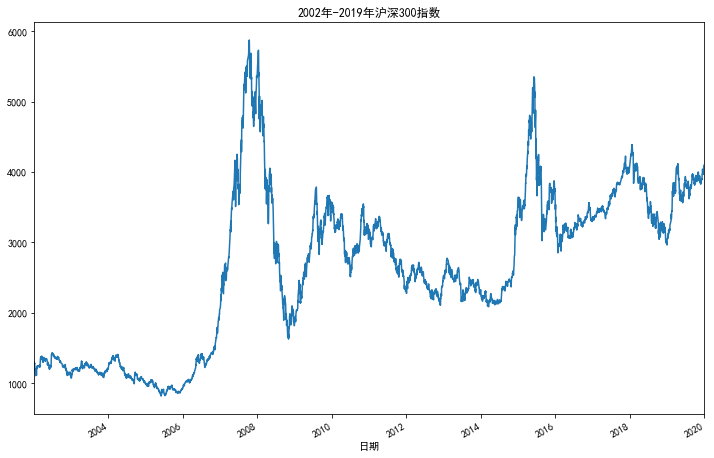

In [144]:
df2['收盘价'].plot()
plt.title("2002年-2019年沪深300指数")

In [150]:
frequence=7#定投频率
invest_money=500#每次定投金额
print("从2002年开始定投到2019年结束的收益情况:")
start=np.datetime64("2002-01-07")
res,buy=invest(df2,frequence,invest_money,start)

从2002年开始定投到2019年结束的收益情况:
总投资： 452000
总收益： 434147.897353141
收益率:  96.05041976839402 %


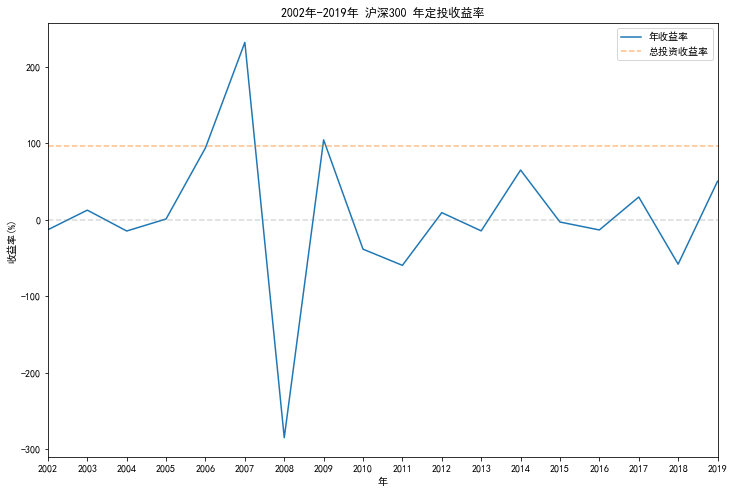

In [146]:
x=[str(i) for i in range(2002,2020)]
y=[]

for year in range(2002,2020):
    '''每年的收益率：年末收益率-年初收益率'''
    each_year=res[res.index.year==year].tail(1)["收益率"][0]-res[res.index.year==year].head(1)["收益率"][0]
    y.append(each_year)

plt.title("2002年-2019年 沪深300 年定投收益率")
plt.ylabel("收益率(%)")
plt.xlabel("年")

plt.plot(x,y,label="年收益率")
plt.plot(x,[res.tail(1)["收益率"][0] for i in range(len(x))],ls="--",alpha=0.5,label="总投资收益率")
plt.plot(x,[0 for i in range(len(x))],color="gray",ls="--",alpha=0.3)
plt.xlim("2002","2019")
plt.legend()

## 3. 探索不同的定投策略，看看你能否得到更好的定投收益呢？通过改变定投策略，在2018年和2019年获得**平均收益率前10名的同学将获得的本次作业的额外加分**。

In [152]:
df3=get_data('0000300','20180101','20191231')
df3=clean_data(df3)
df3.head()

,股票代码,名称,收盘价,最高价,最低价,开盘价,前收盘,涨跌额,涨跌幅,成交量,成交金额
日期,,,,,,,,,,,
2018-01-02,'000300,沪深300,4087.4012,4087.7789,4045.2086,4045.2086,4030.8549,56.5463,0.014028,146935435,1.784020e+11
2018-01-03,'000300,沪深300,4111.3925,4140.0543,4088.7302,4091.4607,4087.4012,23.9913,0.005870,151852218,2.057269e+11
2018-01-04,'000300,沪深300,4128.8119,4137.6420,4105.8858,4114.1213,4111.3925,17.4194,0.004237,134543794,1.745236e+11
2018-01-05,'000300,沪深300,4138.7505,4151.2818,4123.2817,4133.3439,4128.8119,9.9386,0.002407,149009872,1.852063e+11
2018-01-08,'000300,沪深300,4160.1595,4166.3182,4127.3081,4140.8545,4138.7505,21.4090,0.005173,173877666,2.264039e+11


Text(0.5, 1.0, '2018-2019年沪深300指数')

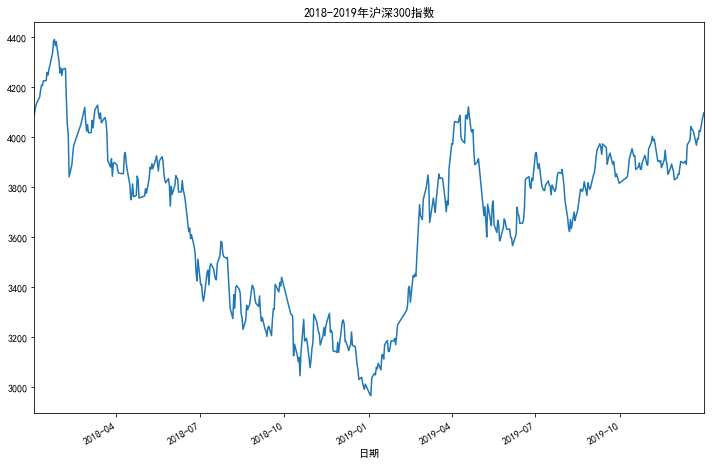

In [153]:
df3["收盘价"].plot()
plt.plot()
plt.title("2018-2019年沪深300指数")

### 定义定投策略(对于每个交易日前一日的收盘价)
---
   * 高于均线15%以内，扣款90%
   * 高于均线15-50%，扣款80%
   * 高于均线50-100% 扣款70%
   * 高于均线 100%以上 扣款60%

---
   * 近10日振幅小于5%
        * 低于均线5%以内,扣款180%
        * 低于均线5-10%以内,扣款190%
        * 低于均线10-20%以内，扣款200%
        * 低于均线20-30%以内，扣款210%
        * 低于均线30-40%以内，扣款220%
        * 低于均线40%以上，扣款230%
        
   * 近10日振幅大于5%
        * 低于均线5%以内,扣款60%
        * 低于均线5-10%以内,扣款70%
        * 低于均线10-20%以内，扣款80%
        * 低于均线20-30%以内，扣款90%
        * 低于均线30-40%以内，扣款100%
        * 低于均线40%以上，扣款110%

In [168]:
def mean_days(df,days,wave):
    '''
     获取n日均线,最近m日振幅
    :param df: 数据集
    :param days: 均线天数
    :params wave:最近m日振幅
    :return average,wavelength:均线、近m日振幅
    '''
    average=[]
    wavelength=[]
    start=df.head(1).index-np.timedelta64(days+1,"D")
    start=start.astype('str')[0].replace("-","")#转换为字符串
    
    df4=get_data('0000300',start,'20191231')#获得原始数据前days天的数据用以求均值
    df4=clean_data(df4)
    for i in df3.index:
        start_date=i-np.timedelta64(days+1,"D")
        ave=df4[(df4.index>start_date) & (df4.index<i)]['收盘价'].mean()
        average.append(ave)
    ########求振幅#######
    start2=df.head(1).index-np.timedelta64(wave+1,"D")
    start2=start2.astype('str')[0].replace("-","")#转换为字符串
    df5=get_data('0000300',start2,'20191231')
    df5=clean_data(df5)
    
    for i in df3.index:
        start_date=i-np.timedelta64(wave+1,"D")
        interval=df5[(df5.index>start_date) & (df5.index<i)]['收盘价']
        length=interval.max()/interval.min()-1#最大涨跌幅
        wavelength.append(length)
        
    return average,wavelength

def stratege(ml,wl,T_1):
    '''
    定投策略
    :param ml:均线
    :param wl:振幅
    :param T_1:前1日收盘价
    '''
    cal=T_1/ml-1#大于0,则高于均线
    if(cal>=0 and cal<0.15):
        return 0.9
    elif(cal>0.15 and cal<0.5):
        return 0.8
    elif(cal>=0.5 and cal<1):
        return 0.7
    elif(cal>=1):
        return 0.6
    
    elif(wl>0.05):
        
        if(cal>=-0.05 and cal<0):
            return 0.6
        elif(cal>=-0.1 and cal<-0.05):
            return 0.7
        elif(cal>=-0.2 and cal<-0.1):
            return 0.8
        elif(cal>=-0.3 and cal<-0.2):
            return 0.9
        elif(cal>=-0.4 and cal<-0.3):
            return 1.0
        elif(cal<-0.4):
            return 1.1
    else:
        if(cal>=-0.05 and cal<0):
            return 1.8
        elif(cal>=-0.1 and cal<-0.05):
            return 1.9
        elif(cal>=-0.2 and cal<-0.1):
            return 2.0
        elif(cal>=-0.3 and cal<-0.2):
            return 2.1
        elif(cal>=-0.4 and cal<-0.3):
            return 2.2
        elif(cal<-0.4):
            return 2.3

def smart_invest(df1,frequence,invest_money,start_time,days,wave):
    '''
     定投计算
    :param df1: 数据集
    :param frequence: 定投频率
    :param invest_money: 每次定投金额
    :param start: 定投起始日期
    :param days: 参考均线天数

    :return (amount,invest_log): (收益数据DataFrame，定投记录dict)
    '''
    invest_log={}#每次定投的日期记录(日期:大盘指数)
    invest_day=start_time#每次投资的时间
    invest_amount=0#总投资金额
    profile=0#总投资收益
    amount=0#账户总资产
    
    profile_log=[]#总收益日志
    invest_amount_log=[]#账户投资金额日志
    amount_log=[]#总资产日志
    Yield=[]#收益率日志
    
    df1["均线"]=mean_days(df1,days,wave)[0]#获取均线
    df1["振幅"]=mean_days(df1,days,wave)[1]#获取振幅
    for date,quote_change,index,ml,wl in zip(df1.index,df1['涨跌幅'],df1['收盘价'],df1["均线"],df1["振幅"]):
        
        profile+=quote_change*amount#计算当天收益率
        profile_log.append(profile)
        
       
        #判断是否为定投日
        if date==invest_day:
            if(invest_day==start_time):
                T_1=start_time
            else:
                formal_day=1
                while(True):
                    T_1=date-np.timedelta64(formal_day,"D")#前1天的收盘价
                    if(T_1 in df1.index.tolist()):
                        break
                    else:
                        formal_day+=1
            T_1=df1[df1.index==T_1]["收盘价"][0]
            rate=stratege(ml,wl,T_1)
            invest_amount+=invest_money*rate#定投
            invest_log[invest_day]=index#记录定投当日的指数
            
            #判断7天后是否为交易日,如果不是则往后加1天直到找到交易日
            invest_day+=np.timedelta64(frequence,'D')
            flag=0
            while(True):
                if(df1[df1.index==invest_day].index==invest_day):
                    break
                else:
                    invest_day+=np.timedelta64(1,'D')
                    flag+=1
                    if(flag==100):
                        break
                        
            
        invest_amount_log.append(invest_amount)
        amount=invest_amount+profile#更新账户总资产
        amount_log.append(amount)
        try:
            Yield.append(profile/invest_amount*100)#更新收益率
        except:
            Yield.append(0)
    print("总投资：",invest_amount)
    print("总收益：",profile)
    print("收益率: ",profile/invest_amount*100,"%")
    
    over=pd.DataFrame({
        "日期":df1.index,
        "收益率":Yield,
        "账户资产":amount_log,
        "投资金额":invest_amount_log
    })
    over=over.set_index("日期")
    return over,invest_log


优化后的定投策略(参考500日均线，近5日振幅的月定投)：
总投资： 155500.0
总收益： 25157.088842058114
收益率:  16.178192181387853 %
普通定投策略:
总投资： 120000
总收益： 15034.049033023453
收益率:  12.528374194186211 %


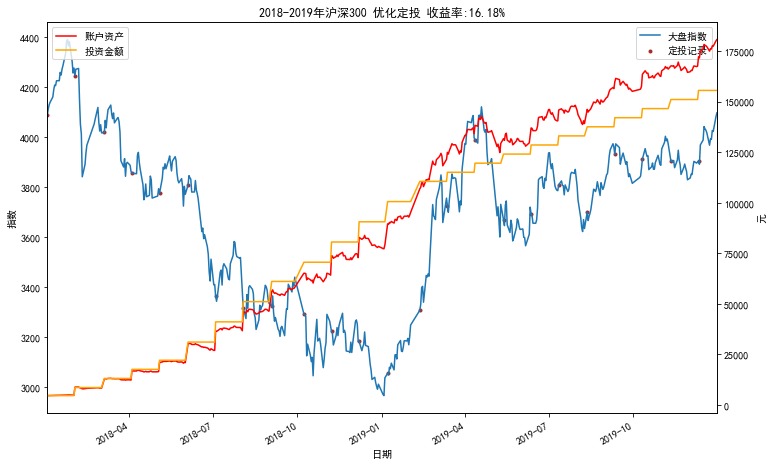

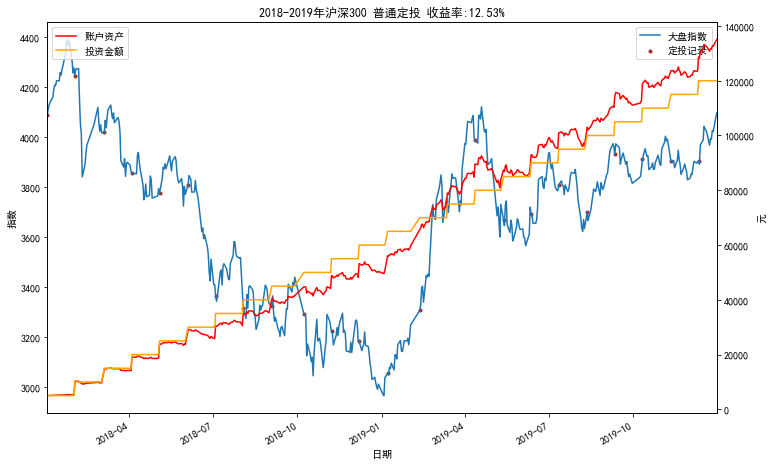

In [178]:
frequence=30#定投频率
invest_money=5000#每次定投金额
start=np.datetime64("2018-01-02")
print("优化后的定投策略(参考500日均线，近5日振幅的月定投)：")
res1,buy1=smart_invest(df3,frequence,invest_money,start,500,5)
print("======================================\n普通定投策略:")
res2,buy2=invest(df3,frequence,invest_money,start)
myplot(df3,res1,buy1,"2018-2019年沪深300 优化定投 收益率")
myplot(df3,res2,buy2,"2018-2019年沪深300 普通定投 收益率")

最大收益率出现在设置定投频率为36日时
总投资： 128500.0
总收益： 22535.332355194918
收益率:  17.53722362271978 %


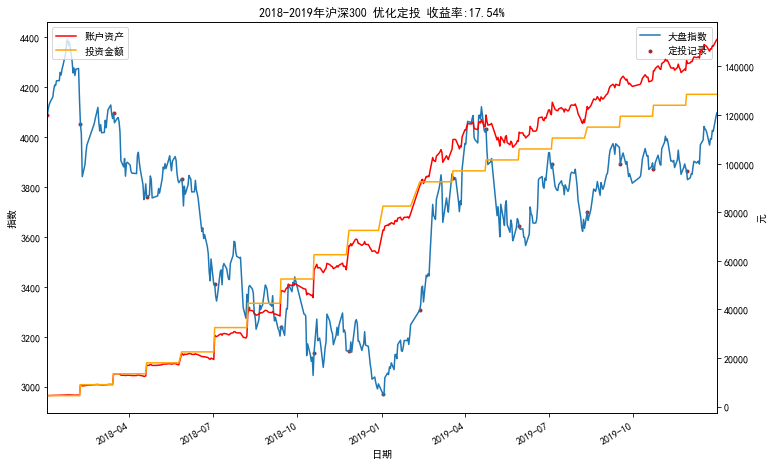

In [182]:
frequence=36
print("最大收益率出现在设置定投频率为36日时")
res3,buy3=smart_invest(df3,frequence,invest_money,start,500,5)
myplot(df3,res3,buy3,"2018-2019年沪深300 优化定投 收益率")